In [10]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
db_host = os.getenv("HOST_NAME")
db_port = os.getenv("HOST_PORT")
db_user = os.getenv("USERNAME")
db_password = os.getenv("PASSWORD")
db_name = os.getenv("DATABASE_NAME")

print(type(db_host))
print(type(db_port))

<class 'str'>
<class 'str'>


In [12]:
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=pymysql.Warning)

db = pymysql.connect(
    host=db_host,     # MySQL Server Address
    port=int(db_port),     # MySQL Server Port
    user=db_user,      # MySQL username
    passwd=db_password,    # password for MySQL username
    db=db_name,   # Database name
    charset='utf8'
)

SQL = "SHOW TABLES"
filtered = pd.read_sql(SQL, db)
filtered

C:\Users\sakso\AppData\Local\Temp\ipykernel_20636\882676089.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  filtered = pd.read_sql(SQL, db)


,Tables_in_khlee
0,2018_20년_수입축산물유통이력
1,#Tableau_12_sid_0000ABDB_1_FQ_Temp_1
2,#Tableau_12_sid_0000ABDB_2_FQ_Temp_1
3,#Tableau_7_sid_00003837_4_Filter
4,#Tableau_7_sid_00003837_5_Filter
...,...
75,weather_data_worldwide_2021
76,weather_data_worldwide_2022
77,weather_data_worldwide_2023
78,world_wide_water


In [3]:
# Define your SQL query
query = "SELECT * FROM seafood_2022_merged"

# Execute the query and store the result in a DataFrame
df_merged = pd.read_sql_query(query, db)

df_merged

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,유통종료일,해외제조업소,해외제조업소 주소,도축장EST코드,도축장명,도축장주소,B/L번호,수출업소,수출업소주소,포장장소
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,2019-04-18,SOUTH SEA FOOD,HIRIKETIYA RD DICKWELLA SRI LANKA,None,None,None,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,None,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.","MUPING DISTRICT MUXIN ROAD 355, YANTAI CITY, S...",None,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,None,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.","MUPING DISTRICT MUXIN ROAD 355, YANTAI CITY, S...",None,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.","THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.","THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,None,"Shandong Haidu Ocean Product Co.,Ltd.","NO.527 Shuangshan East Road Shidao Town,Rongch...",None,None,None,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,2024-09-20,CORPESMAR S.A.C,MZA.CLOTE.13A.H JOSE OLAYA-PIURA-PIURA-PERU,None,None,None,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,2024-01-04,Aleutian Longline LLC - F/V Arctic Prowler,"2157 North Northlake Way, Suite 210 Seattle, W...",None,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,2024-01-03,Aleutian Longline LLC - F/V U.S. Liberator,"2157 North Northlake Way, Suite 210 Seattle, W...",None,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None


In [4]:
df_merged['처리결과'].value_counts()

처리결과
적합       469395
자진 취하       437
부적합         264
반려          185
Name: count, dtype: int64

In [5]:
df_merged['검사종류'].value_counts()

검사종류
현장(221)                    135085
서류(000)                     95753
서류(180)                     94100
현장(180,220)                 16177
서류(100)                     12711
                            ...  
정밀(310,312,380,400)             1
현장(000,210)                     1
무작위표본(000,221,402)              1
정밀(000,312,370,380,415)         1
정밀(312,317,456)                 1
Name: count, Length: 761, dtype: int64

In [6]:
import pandas as pd
import re

# Function to extract and return text and numbers
def extract_text_and_numbers(s):
    if isinstance(s, str):
        text = re.search(r'^[^\(]+', s).group()
        numbers = re.findall(r'\d+', s)
        return [(text, int(num)) for num in numbers]
    return []

# Apply the function and create a new DataFrame
new_rows = df_merged['검사종류'].apply(extract_text_and_numbers).explode()
new_df = pd.DataFrame(new_rows.tolist(), columns=['Text', 'Number'])

# Merge the new DataFrame with the original one

df_merged['검사종류_text'] = new_df['Text']
df_merged['검사종류_num'] = new_df['Number']

df_merged

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,해외제조업소 주소,도축장EST코드,도축장명,도축장주소,B/L번호,수출업소,수출업소주소,포장장소,검사종류_text,검사종류_num
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,HIRIKETIYA RD DICKWELLA SRI LANKA,None,None,None,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None,정밀,310.0
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,"MUPING DISTRICT MUXIN ROAD 355, YANTAI CITY, S...",None,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,정밀,312.0
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,"MUPING DISTRICT MUXIN ROAD 355, YANTAI CITY, S...",None,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,서류,0.0
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,"NO.527 Shuangshan East Road Shidao Town,Rongch...",None,None,None,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None,정밀,370.0
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,MZA.CLOTE.13A.H JOSE OLAYA-PIURA-PIURA-PERU,None,None,None,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None,정밀,221.0
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,"2157 North Northlake Way, Suite 210 Seattle, W...",None,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,정밀,373.0
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,"2157 North Northlake Way, Suite 210 Seattle, W...",None,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,서류,180.0


In [7]:
df_merged.columns

Index(['접수번호', '기관명', '접수일자', '처리기한일시', '신고제품구분', '제품명(영문)', '제품명(한글)', '수입화주',
       '제조국', '수출국', '검사(반입)장소', '용도명', '관세청신청번호', '검사종류', '총수량', '총순중량',
       '총과세가격', '처리결과', '처리일자', '품명', '도축시작일', '도축종료일', '가공시작일', '가공종료일',
       '유통시작일', '유통종료일', '해외제조업소', '해외제조업소 주소', '도축장EST코드', '도축장명', '도축장주소',
       'B/L번호', '수출업소', '수출업소주소', '포장장소', '검사종류_text', '검사종류_num'],
      dtype='object')

In [8]:
df_merged['품명'].value_counts()

품명
연어(냉장)             61391
낙지(활)              16306
바지락(활)             16038
낙지(냉장)             13421
주꾸미(냉동)            12722
                   ...  
유럽물레고둥(활)              1
멸치(냉동,자숙)              1
반원니오징어(냉동)             1
송어(냉장,필렛(F),훈제)        1
삼각대게(냉동,절단,자숙)         1
Name: count, Length: 1212, dtype: int64

### create 유통방식

In [9]:
from tqdm import tqdm_notebook
df = df_merged.copy()
    
df['품명1'] = 0
df['유통방식'] = 0

for i, row in tqdm_notebook(df.iterrows(), total=df.shape[0]):
    idx=row['품명'].index('(')
    df['품명1'][i] = row['품명'][0:idx]
    df['유통방식'][i] = row['품명'][(idx+1):-1]
    
df

  0%|          | 0/470281 [00:00<?, ?it/s]

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,도축장명,도축장주소,B/L번호,수출업소,수출업소주소,포장장소,검사종류_text,검사종류_num,품명1,유통방식
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,None,None,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None,정밀,310.0,참치방어,건조
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,정밀,312.0,낙지,활
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,서류,0.0,개불,활
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,낙지,활
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,개불,활
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,None,None,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None,정밀,370.0,오징어,냉동
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,None,None,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None,정밀,221.0,오징어,"냉동,다리"
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,정밀,373.0,대구,"냉동,내장"
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,서류,180.0,대구,"냉동,내장"


In [10]:
distribution_method = ['활', '냉동', '냉장', '염장']
df['유통방식1'] = ""

for i, row in tqdm_notebook(df.iterrows(), total=df.shape[0]):

    idx=row['유통방식'].find(',')
    
    if (idx != -1):
        df['유통방식1'][i] = row['유통방식'][idx+1:]
        df['유통방식'][i] = row['유통방식'][0:idx]
        
df['유통방식1'].unique()

  0%|          | 0/470281 [00:00<?, ?it/s]

array(['', '동체', '살', '지느러미,자숙', '자숙', '살,자숙', '다리,자숙', '절단', '슬라이스(S)',
       '개아지살,살,포장횟감', '살,자숙,포장횟감', '슬라이스(S),포장횟감', '살,포장횟감', '자숙,포장횟감',
       '필렛(F)', '훈제', '개아지살,살', '슬라이스(S),자숙,포장횟감', '동체,포장횟감', '다리',
       '포장횟감,필렛(F)', '살,슬라이스(S),포장횟감', '간', '한쪽껍질붙은', '가염', '껍질', '알',
       '건조', '지느러미', '집게다리,자숙', '외투막', '목살', '필렛(F),횟감', '다리,자숙,포장횟감',
       '주꾸미등)(냉동', '볼살', '턱살', '꼬리살', '머리살', '염장', '개아지살,살,자숙', '횟감',
       '다리,포장횟감', '자숙,절단', '포장횟감', '알,캐비아대용', '집게다리', '집게다리,살,자숙',
       '동체,자숙', '포장횟감,필렛(F),훈제', '곤이', '목살,횟감', '머리', '볼살,횟감', '턱살,횟감',
       '자숙,한쪽껍질붙은', '동체,자숙,포장횟감', '창난', '슬라이스(S),자숙', '외투막,살',
       '개아지살,살,횟감', '머리살,횟감', '개아지살,살,자숙,포장횟감', '자숙,절단,횟감',
       '구운,슬라이스(S),포장횟감', '난포선', '머리_외화획득용', '살,슬라이스(S),자숙,포장횟감', '눈살,횟감',
       '눈살', '내장', '꼬리_외화획득용', '구운,포장횟감', '살,횟감', '외투막,살,자숙',
       '개아지살,살,슬라이스(S),포장횟감', '냉동', '자숙,횟감', '동체,횟감', '구운,필렛(F)',
       '자숙,필렛(F)', '필렛(F),훈제', '필렛(F),포장횟감', '가염,필렛(F)', '척추뼈_외화획득용',
       '꼬리살,횟감', '집게다리,살', '알,캐비아대용,횟감',

In [11]:
df['유통방식'].value_counts()

유통방식
냉동      209493
냉장      128257
활       117913
건조        8744
염장        5417
줄기         278
절단         157
자숙          11
귀            6
구운           4
갑오징어         1
Name: count, dtype: int64

In [12]:
for i, row in tqdm_notebook(df.iterrows(), total=df.shape[0]):
    if row['유통방식']=='줄기': df['유통방식'][i] = row['유통방식1']
    if row['유통방식']=='절단': df['유통방식'][i] = row['유통방식1']
    if row['유통방식']=='자숙': df['유통방식'][i] = row['유통방식1']
    if row['유통방식']=='구운': df = df.drop(index=i, axis=0)
    if row['유통방식']=='귀': df = df.drop(index=i, axis=0)
    if row['유통방식']=='갑오징어': df = df.drop(index=i, axis=0)   

df = df.drop('유통방식1', axis=1)
df['유통방식'].value_counts()

  0%|          | 0/470281 [00:00<?, ?it/s]

유통방식
냉동    209493
냉장    128257
활     117913
건조      8932
염장      5675
Name: count, dtype: int64

### pre_process 품명

In [13]:
df = df.drop('품명', axis=1)   
df.rename(columns = {'품명1':'품명'},inplace=True)
df

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,도축장명,도축장주소,B/L번호,수출업소,수출업소주소,포장장소,검사종류_text,검사종류_num,품명,유통방식
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,None,None,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None,정밀,310.0,참치방어,건조
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,정밀,312.0,낙지,활
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,None,None,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,서류,0.0,개불,활
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,낙지,활
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,None,None,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,개불,활
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,None,None,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None,정밀,370.0,오징어,냉동
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,None,None,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None,정밀,221.0,오징어,냉동
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,정밀,373.0,대구,냉동
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,None,None,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,서류,180.0,대구,냉동


## 대분류, 중분류 전처리

In [14]:
main_class = pd.read_csv('main_class.csv', encoding = 'cp949')
main_name = main_class.columns
main_name

Index(['어류', '패류', '두족류', '갑각류', '해조류', '기타'], dtype='object')

In [15]:
middle_class = pd.read_csv('middle_class.csv', encoding = 'cp949')
middle_name = middle_class.columns
middle_name

Index(['낙지', '개불', '바지락', '주꾸미', '감태', '톳', '재첩', '갈래곰보', '복어', '장어',
       ...
       '달고기', '쏨뱅이', '백합', '상어', '오징어', '넙치', '칼고기', '럼프피쉬', '동사리', '메기'],
      dtype='object', length=106)

In [16]:
df_class = df.copy()
df_class['품명_중분류'] = ""
df_class['품명_대분류'] = ""
middle_tmp = ""

for i, row in tqdm_notebook(df_class.iterrows(), total = df_class.shape[0]):
   
    for k in range(middle_class.shape[1]):
        m = middle_class.index[middle_class[middle_name[k]]== row['품명']].tolist()
        
        if m : 
            df_class['품명_중분류'][i] = middle_name[k]
            middle_tmp = middle_name[k]  
            break                
            
    for k in range(main_class.shape[1]):
        m = main_class.index[main_class[main_name[k]]== middle_tmp].tolist()
        
        if m : 
            df_class['품명_대분류'][i] = main_name[k]   
            break
 

  0%|          | 0/470270 [00:00<?, ?it/s]

In [17]:
df_class

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,B/L번호,수출업소,수출업소주소,포장장소,검사종류_text,검사종류_num,품명,유통방식,품명_중분류,품명_대분류
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None,정밀,310.0,참치방어,건조,방어,어류
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,정밀,312.0,낙지,활,낙지,두족류
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,서류,0.0,개불,활,개불,기타
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,낙지,활,낙지,두족류
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,개불,활,개불,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None,정밀,370.0,오징어,냉동,오징어,두족류
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None,정밀,221.0,오징어,냉동,오징어,두족류
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,정밀,373.0,대구,냉동,대구,어류
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,서류,180.0,대구,냉동,대구,어류


In [20]:
df_class.isna().sum()

접수번호              0
기관명               0
접수일자              0
처리기한일시            4
신고제품구분            0
제품명(영문)           0
제품명(한글)           0
수입화주              6
제조국               0
수출국               0
검사(반입)장소          0
용도명               0
관세청신청번호           0
검사종류              4
총수량               0
총순중량              0
총과세가격             0
처리결과              0
처리일자            358
도축시작일        470270
도축종료일        470270
가공시작일        470250
가공종료일        470258
유통시작일          2394
유통종료일        318010
해외제조업소            6
해외제조업소 주소         6
도축장EST코드     470270
도축장명         470270
도축장주소        470270
B/L번호             2
수출업소              4
수출업소주소            6
포장장소         470270
검사종류_text        26
검사종류_num         26
품명                0
유통방식              0
품명_중분류            0
품명_대분류            0
dtype: int64

In [21]:
df_class.to_csv('seafood_2022_class_and_distributed_method.csv', index=False)
df_class

,접수번호,기관명,접수일자,처리기한일시,신고제품구분,제품명(영문),제품명(한글),수입화주,제조국,수출국,...,B/L번호,수출업소,수출업소주소,포장장소,검사종류_text,검사종류_num,품명,유통방식,품명_중분류,품명_대분류
0,201800526644(2018000001),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-15 18:00:00,수산물,DRIED RAINBOW RUNNER,마른방어(참치방어),한스무역,스리랑카,스리랑카,...,SOUTH SEA FOOD,KMTCCMB0047185,"HIRIKETIYA RD, DICKWELLA. SRI LANKA",None,정밀,310.0,참치방어,건조,방어,어류
1,201800526645(2018000002),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE POULP SQUID,활낙지,용해수산,중국,중국,...,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,정밀,312.0,낙지,활,낙지,두족류
2,201800526646(2018000003),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:00,수산물,LIVE URECHIS UNICINCTUS,활개불,용해수산,중국,중국,...,"YANTAI HANSHENG AQUATIC FOODS CO.,LTD.",HDFC17E4766580,"MUPING DISTRICT MUXIN ROAD 355, YANTAI, SHANDO...",None,서류,0.0,개불,활,개불,기타
3,201800526647(2018000004),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:00:08,수산물,LIVE POULP SQUID,활낙지,주식회사 양지무역,중국,중국,...,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,낙지,활,낙지,두족류
4,201800526648(2018000005),경인청 인천항검사소,2018-01-02 00:00:00,2018-01-04 09:01:12,수산물,LIVE URECHIS UNICINCTUS,활개불,주식회사 양지무역,중국,중국,...,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,"THE WEST OF YANGJIAZHUANG VILLAGE,YANGMADAO OF...",None,서류,0.0,개불,활,개불,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,202200779592,부산청 감천항검사소,2022-12-12 16:34:58,2022-12-14 16:34:58,수산물,FROZEN SQUID,냉동오징어,(주)신해무역,중국,중국,...,SHANDONG HAIDU OCEAN PRODUCT CO.LTD.,SOFPRWB22044571,"NO.527, EAST ROAD SHUANGSHAN SHIDAO TOWN RONGC...",None,정밀,370.0,오징어,냉동,오징어,두족류
470277,202200779659,부산청 수입관리과,2022-12-12 16:50:36,2022-12-14 16:50:36,수산물,FROZEN GIANT SQUID TENTACLES,냉동 오징어다리,(주)광천김,페루,페루,...,CORPESMAR S.A.C,COSU6345238060,MZA. C LOTE 13 JOSE OLAYA-PIURA RUC.20529945192,None,정밀,221.0,오징어,냉동,오징어,두족류
470278,202200779886,부산청 수입관리과,2022-12-12 17:45:47,2022-12-14 17:45:47,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,정밀,373.0,대구,냉동,대구,어류
470279,202200779892,부산청 수입관리과,2022-12-12 17:49:38,2022-12-14 17:49:38,수산물,FROZEN COD STOMACHS,냉동 대구 위,네오푸드,미국,미국,...,ALEUTIAN LONGLINE LLC,NAM5114609,"2157 NORTHLAKE WAY SUITE 210 SEATTLE, WA 98103",None,서류,180.0,대구,냉동,대구,어류


In [22]:
df_class.columns

Index(['접수번호', '기관명', '접수일자', '처리기한일시', '신고제품구분', '제품명(영문)', '제품명(한글)', '수입화주',
       '제조국', '수출국', '검사(반입)장소', '용도명', '관세청신청번호', '검사종류', '총수량', '총순중량',
       '총과세가격', '처리결과', '처리일자', '도축시작일', '도축종료일', '가공시작일', '가공종료일', '유통시작일',
       '유통종료일', '해외제조업소', '해외제조업소 주소', '도축장EST코드', '도축장명', '도축장주소', 'B/L번호',
       '수출업소', '수출업소주소', '포장장소', '검사종류_text', '검사종류_num', '품명', '유통방식',
       '품명_중분류', '품명_대분류'],
      dtype='object')

In [23]:
df_class['신고제품구분'].value_counts()

신고제품구분
수산물    470270
Name: count, dtype: int64

In [24]:
df_class['처리결과'].value_counts()

처리결과
적합       469385
자진 취하       436
부적합         264
반려          185
Name: count, dtype: int64

In [25]:
## change 자진 취하 and 반려 to 불적합

df_class['처리결과'] = df_class['처리결과'].replace('자진 취하', '부적합')
df_class['처리결과'] = df_class['처리결과'].replace('반려', '부적합')

df_class['처리결과'].value_counts()

처리결과
적합     469385
부적합       885
Name: count, dtype: int64

In [26]:
df_class.isna().sum()

접수번호              0
기관명               0
접수일자              0
처리기한일시            4
신고제품구분            0
제품명(영문)           0
제품명(한글)           0
수입화주              6
제조국               0
수출국               0
검사(반입)장소          0
용도명               0
관세청신청번호           0
검사종류              4
총수량               0
총순중량              0
총과세가격             0
처리결과              0
처리일자            358
도축시작일        470270
도축종료일        470270
가공시작일        470250
가공종료일        470258
유통시작일          2394
유통종료일        318010
해외제조업소            6
해외제조업소 주소         6
도축장EST코드     470270
도축장명         470270
도축장주소        470270
B/L번호             2
수출업소              4
수출업소주소            6
포장장소         470270
검사종류_text        26
검사종류_num         26
품명                0
유통방식              0
품명_중분류            0
품명_대분류            0
dtype: int64

In [39]:
df_class = df_class.dropna(axis=0)
df_class.isna().sum()

접수일자         0
수입화주         0
수출국          0
해외제조업소       0
수출업소         0
품명_대분류       0
품명_중분류       0
품명           0
총수량          0
총순중량         0
총순중량         0
유통방식         0
처리결과         0
유통방식         0
검사종류_text    0
dtype: int64

In [27]:

cols_to_filter = ['접수일자', '수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명','총수량', '총순중량',
       '총순중량', '처리결과', '유통방식', '검사종류_text']

In [28]:
df_class = df_class[cols_to_filter]

df_class['접수일자']

0         2018-01-02  00:00:00
1         2018-01-02  00:00:00
2         2018-01-02  00:00:00
3         2018-01-02  00:00:00
4         2018-01-02  00:00:00
                  ...         
470276    2022-12-12  16:34:58
470277    2022-12-12  16:50:36
470278    2022-12-12  17:45:47
470279    2022-12-12  17:49:38
470280    2022-12-12  17:51:37
Name: 접수일자, Length: 470270, dtype: object

In [29]:
## from 접수일자 change to 'year', 'month', 'week', 'year_month','year_week', 'season',

df_class['접수일자'] = pd.to_datetime(df_class['접수일자'])

df_class['year'] = df_class['접수일자'].dt.year
df_class['month'] = df_class['접수일자'].dt.month
df_class['week'] = df_class['접수일자'].dt.isocalendar().week


In [30]:
## year_month e.g. 2021-01, 2021-02, year_week e.g. 2021-53, 2021-54

df_class['year_month'] = df_class['접수일자'].dt.strftime('%Y-%m')

df_class['year_week'] = df_class['접수일자'].dt.strftime('%Y-%W')

df_class



,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,총순중량,처리결과,유통방식,검사종류_text,year,month,week,year_month,year_week
0,2018-01-02 00:00:00,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,915.2,적합,건조,정밀,2018,1,1,2018-01,2018-01
1,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,3300.0,적합,활,정밀,2018,1,1,2018-01,2018-01
2,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,150.0,적합,활,서류,2018,1,1,2018-01,2018-01
3,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,2000.0,적합,활,서류,2018,1,1,2018-01,2018-01
4,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,300.0,적합,활,서류,2018,1,1,2018-01,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,2022-12-12 16:34:58,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,124500.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50
470277,2022-12-12 16:50:36,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,22000.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50
470278,2022-12-12 17:45:47,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,535.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50
470279,2022-12-12 17:49:38,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,1185.0,적합,냉동,서류,2022,12,50,2022-12,2022-50


In [31]:
# Create a custom function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'fall'
    else:
        return 'winter'

# Apply the function to create a 'season' column
df_class['season'] = df_class['month'].apply(get_season)

df_class

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,총순중량,처리결과,유통방식,검사종류_text,year,month,week,year_month,year_week,season
0,2018-01-02 00:00:00,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,915.2,적합,건조,정밀,2018,1,1,2018-01,2018-01,winter
1,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,3300.0,적합,활,정밀,2018,1,1,2018-01,2018-01,winter
2,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,150.0,적합,활,서류,2018,1,1,2018-01,2018-01,winter
3,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,2000.0,적합,활,서류,2018,1,1,2018-01,2018-01,winter
4,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,300.0,적합,활,서류,2018,1,1,2018-01,2018-01,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,2022-12-12 16:34:58,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,124500.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50,winter
470277,2022-12-12 16:50:36,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,22000.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50,winter
470278,2022-12-12 17:45:47,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,535.0,적합,냉동,정밀,2022,12,50,2022-12,2022-50,winter
470279,2022-12-12 17:49:38,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,1185.0,적합,냉동,서류,2022,12,50,2022-12,2022-50,winter


In [32]:
df_merged.columns

Index(['접수번호', '기관명', '접수일자', '처리기한일시', '신고제품구분', '제품명(영문)', '제품명(한글)', '수입화주',
       '제조국', '수출국', '검사(반입)장소', '용도명', '관세청신청번호', '검사종류', '총수량', '총순중량',
       '총과세가격', '처리결과', '처리일자', '품명', '도축시작일', '도축종료일', '가공시작일', '가공종료일',
       '유통시작일', '유통종료일', '해외제조업소', '해외제조업소 주소', '도축장EST코드', '도축장명', '도축장주소',
       'B/L번호', '수출업소', '수출업소주소', '포장장소', '검사종류_text', '검사종류_num'],
      dtype='object')

In [47]:
# !pip install pycountry

In [34]:
수출국 = df_class['수출국'].value_counts()

수출국

수출국
중국       142316
노르웨이      79011
일본        47049
베트남       38455
러시아       34104
          ...  
팔라우           2
카보베르데         1
핀란드           1
벨기에           1
알제리           1
Name: count, Length: 112, dtype: int64

In [35]:
country_to_continent = {
    '스리랑카': 'Asia',
    '중국': 'Asia',
    '베트남': 'Asia',
    '모로코': 'Africa',
    '캐나다': 'North America',
    '미국': 'North America',
    '태국': 'Asia',
    '말레이시아': 'Asia',
    '터키': 'Asia',
    '필리핀': 'Asia',
    '미얀마': 'Asia',
    '호주': 'Oceania',
    '노르웨이': 'Europe',
    '인도네시아': 'Asia',
    '바레인': 'Asia',
    '일본': 'Asia',
    '튀니지': 'Africa',
    '러시아': 'Europe',  # Or 'Asia', depending on the context
    '방글라데시': 'Asia',
    '그리스': 'Europe',
    '아랍에미리트': 'Asia',
    '파키스탄': 'Asia',
    '에콰도르': 'South America',
    '대만': 'Asia',
    '싱가포르': 'Asia',
    '이집트': 'Africa',
    '마다가스카르': 'Africa',
    '뉴질랜드': 'Oceania',
    '라오스': 'Asia',
    '홍콩': 'Asia',
    '캄보디아': 'Asia',
    '아일랜드': 'Europe',
    '칠레': 'South America',
    '인도': 'Asia',
    '루마니아': 'Europe',
    '남아프리카 공화국': 'Africa',
    '세이셸': 'Africa',
    '멕시코': 'North America',
    '스페인': 'Europe',
    '영국': 'Europe',
    '아르헨티나': 'South America',
    '아이슬란드': 'Europe',
    '몰디브': 'Asia',
    '오만': 'Asia',
    '팔라우': 'Oceania',
    '덴마크': 'Europe',
    '페루': 'South America',
    '프랑스': 'Europe',
    '투발루': 'Oceania',
    '모리타니': 'Africa',
    '스웨덴': 'Europe',
    '몰타': 'Europe',
    '솔로몬 제도': 'Oceania',
    '대한민국': 'Asia',
    '바누아투': 'Oceania',
    '기타(ZZ)': 'Other',
    '네덜란드': 'Europe',
    '미크로네시아 연방': 'Oceania',
    '가나': 'Africa',
    '키리바시': 'Oceania',
    '모리셔스': 'Africa',
    '탄자니아': 'Africa',
        '세네갈': 'Africa',
    '시에라리온': 'Africa',
    '기니': 'Africa',
    '우루과이': 'South America',
    '베네수엘라': 'South America',
    '라이베리아': 'Africa',
    '기니비사우': 'Africa',
    '앙골라': 'Africa',
    '모잠비크': 'Africa',
    '감비아': 'Africa',
    '파나마': 'North America',
    '브라질': 'South America',
    '불가리아': 'Europe',
    '케냐': 'Africa',
    '가이아나': 'South America',
    '파푸아뉴기니': 'Oceania',
    '벨기에': 'Europe',
    '사우디아라비아': 'Asia',
    '수리남': 'South America',
    '통가': 'Oceania',
    '페로 제도': 'Europe',
    '이란': 'Asia',
    '독일': 'Europe',
    '그린란드': 'North America',
    '트리니다드 토바고': 'North America',
    '지부티': 'Africa',
    '마셜 제도': 'Oceania',
    '나미비아': 'Africa',
    '니카라과': 'North America',
    '우크라이나': 'Europe',
    '피지': 'Oceania',
    '포르투갈': 'Europe',
    '포클랜드 제도': 'South America',
    '쿠바': 'North America',
    '콜롬비아': 'South America',
    '크로아티아': 'Europe',
    '이탈리아': 'Europe',
    '동티모르': 'Asia',
    '카메룬': 'Africa',
    '예멘': 'Asia',
    '카보베르데': 'Africa',
    '나우루': 'Oceania',
    '리투아니아': 'Europe',
    '코트디부아르': 'Africa',
    '콩고 민주 공화국': 'Africa',
    '온두라스': 'North America',
    '핀란드': 'Europe',
    '미국령 사모아': 'Oceania',
    '튀르키예': 'Europe',
    '알제리': 'Africa',
    
    
}

df_class['수출국_대륙'] = df_class['수출국'].map(country_to_continent)

df_class['수출국_대륙'].value_counts()

수출국_대륙
Asia             274694
Europe           120165
North America     29896
South America     26125
Africa            15570
Oceania            3709
Other               111
Name: count, dtype: int64

In [36]:
# df_class.drop('continent', axis=1, inplace=True)

# df_class

In [40]:
df_class.isna().sum()

접수일자          0
수입화주          0
수출국           0
해외제조업소        0
수출업소          0
품명_대분류        0
품명_중분류        0
품명            0
총수량           0
총순중량          0
총순중량          0
처리결과          0
유통방식          0
검사종류_text     0
year          0
month         0
week          0
year_month    0
year_week     0
season        0
수출국_대륙        0
dtype: int64

In [38]:
df_class = df_class.dropna(axis=0)

In [39]:
df = df_class.copy()

### calculate the ratio of these columns



In [ ]:
###columns_to_encode = ['수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명','continent']


In [139]:
columns_to_encode = ['수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명','수출국_대륙', '유통방식']

def calculate_ratio(column):
    total_counts = df[column].value_counts()
    부적합_counts = df[df['처리결과'] == '부적합'][column].value_counts()
    부적합_ratios = 부적합_counts / total_counts
    ## fill na with 0
    부적합_ratios = 부적합_ratios.fillna(0)
    return 부적합_ratios

In [105]:
df.columns

Index(['접수일자', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명', '총수량',
       '총순중량', '총순중량', '유통방식', '처리결과', '유통방식', '검사종류_text', 'year', 'month',
       'week', 'year_month', 'year_week', 'season', '수출국_대륙', '부적합_ratio',
       '수입화주_ratio', '수출국_ratio', '해외제조업소_ratio', '수출업소_ratio', '품명_대분류_ratio',
       '품명_중분류_ratio', '품명_ratio', '수출국_대륙_ratio'],
      dtype='object')

In [140]:
# Calculate 부적합 ratios for each encoded column and map the values back to the original DataFrame
for column in columns_to_encode:
    부적합_ratios = calculate_ratio(column)
    
    # Create a mapping of encoded categories to their 부적합_ratios
    ratio_mapping = 부적합_ratios.to_dict()
    
    # Map the 부적합_ratios back to the original DataFrame using the encoded columns
    df[column + '_ratio'] = df[column].map(ratio_mapping)
df

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
0,2018-01-02 00:00:00,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,...,Asia,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825
1,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
2,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
3,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
4,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,2022-12-12 16:34:58,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521
470277,2022-12-12 16:50:36,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,...,South America,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521
470278,2022-12-12 17:45:47,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521
470279,2022-12-12 17:49:38,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521


In [43]:
df['수입화주'].value_counts()

수입화주
동원산업(주)              9688
(주)신세계푸드             7257
(주)블루씨푸드             6572
(주)거성씨푸드             5813
주식회사 우신상사            4328
                     ... 
야치오코리아(주)               1
(주)블루션                  1
주식회사 와이케이씨              1
아시안키친(주) 빅푸드인터내셔널       1
주식회사 아이지더블유티            1
Name: count, Length: 4253, dtype: int64

In [44]:
df[df['처리결과'] == '부적합']['수입화주'].value_counts()

수입화주
대양상사               25
롯데쇼핑(주)롯데마트사업본부    17
신라수산               13
(주)신라트레이딩          12
와이에스글로벌            12
                   ..
신일무역                1
(주)나눔푸드             1
천우교역                1
(주)태종에프디(태종FD)      1
(주)미선푸드             1
Name: count, Length: 485, dtype: int64

In [46]:
# df.loc[df['수입화주']=='동원산업(주)'] & df.loc[df['처리결과']=='부적합']

In [47]:
df[df['처리결과'] == '부적합']['수입화주'].value_counts()

수입화주
대양상사               25
롯데쇼핑(주)롯데마트사업본부    17
신라수산               13
(주)신라트레이딩          12
와이에스글로벌            12
                   ..
신일무역                1
(주)나눔푸드             1
천우교역                1
(주)태종에프디(태종FD)      1
(주)미선푸드             1
Name: count, Length: 485, dtype: int64

In [48]:
## find the 수입화주 == 동원산업(주) and 처리결과 == 부적합

df.loc[(df['수입화주']=='(주)신세계푸드') & (df['처리결과']=='부적합')]

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
122006,2019-09-09,(주)신세계푸드,노르웨이,OCEAN QUALITY AS,OCEAN QUALITY AS,어류,연어,연어,54,1041.90,...,Europe,0.000551,0.000278,0.001556,0.001739,0.002009,0.000357,0.000307,0.000741,0.000312
127686,2019-09-02,(주)신세계푸드,노르웨이,OCEAN QUALITY AS,OCEAN QUALITY AS,어류,연어,연어,27,528.88,...,Europe,0.000551,0.000278,0.001556,0.001739,0.002009,0.000357,0.000307,0.000741,0.000312
159450,2019-01-17,(주)신세계푸드,노르웨이,COAST SEAFOOD AS,COAST SEAFOOD A/S,어류,연어,연어,26,583.60,...,Europe,0.000551,0.000278,0.001003,0.000480,0.002009,0.000357,0.000307,0.000741,0.000312
185592,2019-09-09,(주)신세계푸드,노르웨이,OCEAN QUALITY AS,OCEAN QUALITY AS,어류,연어,연어,54,1040.50,...,Europe,0.000551,0.000278,0.001556,0.001739,0.002009,0.000357,0.000307,0.000741,0.000312


In [141]:
df.to_csv('seafood_2022_class_and_distributed_method_ratio.csv', index=False, encoding='utf-8')

df

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
0,2018-01-02 00:00:00,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,...,Asia,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825
1,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
2,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
3,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
4,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,2022-12-12 16:34:58,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521
470277,2022-12-12 16:50:36,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,...,South America,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521
470278,2022-12-12 17:45:47,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521
470279,2022-12-12 17:49:38,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521


In [142]:
df.isna().sum()

접수일자            0
수입화주            0
수출국             0
해외제조업소          0
수출업소            0
품명_대분류          0
품명_중분류          0
품명              0
총수량             0
총순중량            0
총순중량            0
처리결과            0
유통방식            0
검사종류_text       0
year            0
month           0
week            0
year_month      0
year_week       0
season          0
수출국_대륙          0
수입화주_ratio      0
수출국_ratio       0
해외제조업소_ratio    0
수출업소_ratio      0
품명_대분류_ratio    0
품명_중분류_ratio    0
품명_ratio        0
수출국_대륙_ratio    0
유통방식_ratio      0
dtype: int64

In [115]:
test.loc[test['품명_중분류'].isna()]['품명'].value_counts()

품명
전갱이                                44
바닷가재과,Homarus americanus           10
만두성게과,Loxechinus albus알             8
뿔소라과,Hexaplex erythrostomus         8
새눈치                                 5
새다래                                 4
꼴뚜기속,Loligo gahi                    4
꼴뚜기과,Doryteuthis opalescens         3
성게                                  3
뉴질랜드먹장어                             2
물맞이게과,Maja squinado                 2
악상어                                 2
샛돔과,Seriolella caerulea             2
아포돌기해삼속,Apostichus californicus     1
퉁돔속,Lutjanus sanguineus             1
이리치과,Anarhichas denticulatus        1
대왕범바리                               1
닭새우속,Panulirus regius               1
곱사연어알                               1
살오징어                                1
청어속,Clupea harengus알                1
비늘삼치                                1
진환도상어                               1
남방대구과,Macruronus magellanicus알      1
돌기해삼과,Stichopus hermanni            1
피조개속,Anadara antiquata              1
흉상어속, Car

In [118]:
df.loc[df['품명']=='전갱이']['품명_중분류'] = '전갱이'

df.loc[df['품명']=='전갱이']['품명_대분류'] = '어류'

In [130]:
# if the 품명_중분류 is '' and 품명=='전갱이' then 품명_중분류 = '전갱이' and 품명_대분류 = '어류'

df.loc[df['품명']=='전갱이', '품명_중분류']='전갱이'
df.loc[df['품명']=='전갱이', '품명_대분류']='어류' 

In [135]:
# delete the row if the 품명_중분류 is ''

test_df = df.drop(df[df['품명_중분류']==''].index)


품명
바닷가재과,Homarus americanus           10
만두성게과,Loxechinus albus알             8
뿔소라과,Hexaplex erythrostomus         8
새눈치                                 5
새다래                                 4
꼴뚜기속,Loligo gahi                    4
성게                                  3
꼴뚜기과,Doryteuthis opalescens         3
샛돔과,Seriolella caerulea             2
뉴질랜드먹장어                             2
물맞이게과,Maja squinado                 2
악상어                                 2
닭새우속,Panulirus regius               1
이리치과,Anarhichas denticulatus        1
아포돌기해삼속,Apostichus californicus     1
살오징어                                1
흉상어속, Carcharhinus limbatus         1
청어속,Clupea harengus알                1
비늘삼치                                1
진환도상어                               1
남방대구과,Macruronus magellanicus알      1
돌기해삼과,Stichopus hermanni            1
피조개속,Anadara antiquata              1
곱사연어알                               1
대왕범바리                               1
퉁돔속,Lutjanus sanguineus             1
등흑점옥두어   

In [138]:
df = test_df

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
0,2018-01-02 00:00:00,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,...,Asia,0.0,0.040580,0.0,0.0,0.002019,0.003633,0.000000,0.001842,0.005822
1,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
2,2018-01-02 00:00:00,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,...,Asia,0.0,0.001434,0.0,0.0,0.001187,0.000000,0.000000,0.001842,0.002163
3,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
4,2018-01-02 00:00:00,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001187,0.000000,0.000000,0.001842,0.002163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470276,2022-12-12 16:34:58,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521
470277,2022-12-12 16:50:36,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,...,South America,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002220,0.002521
470278,2022-12-12 17:45:47,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,...,North America,0.0,0.007354,0.0,0.0,0.002019,0.001560,0.000849,0.004717,0.002521
470279,2022-12-12 17:49:38,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,...,North America,0.0,0.007354,0.0,0.0,0.002019,0.001560,0.000849,0.004717,0.002521


In [133]:
df.loc[df['품명']=='대서양고등어', '품명_중분류'] = '고등어'

df.loc[df['품명']=='대서양고등어', '품명_대분류'] = '어류'

In [56]:
df['품명_대분류'].unique()

array(['어류', '두족류', '기타', '패류', '갑각류', '', '해조류'], dtype=object)

In [61]:
df.loc[df['품명_대분류']=='']['품명'].value_counts()

품명
참조기                       1398
새꼬리민태알                     365
스피노잠                       126
줄민태                         82
회초리꼬리민태                     70
민태                          17
민태속,Johnius dussumieri      16
줄비늘치                        12
등갈민태                         8
새꼬리민태                        4
주름진두발                        2
왕연어                          1
대서양조기                        1
옥두어                          1
닭새우,Jasus edwardsii          1
Name: count, dtype: int64

In [65]:
### find the 품명 =='참조기'and map the df['품명_대분류'] as '조기'

df.loc[df['품명']=='참조기', '품명_대분류'] = '조기'


In [80]:
df['품명_중분류'].unique()

array(['방어', '낙지', '개불', '바지락', '주꾸미', '오징어', '복어', '백합', '새우', '조개',
       '장어', '가재', '해파리', '고둥', '아귀', '상어', '잉어', '메기', '붕어', '홍어', '문어',
       '홍합', '밴댕이', '쥐치', '대구', '꼬막', '청어', '틸라피아', '멍게', '망둑어', '키조개',
       '가리비', '게', '드렁허리', '쏘가리', '가자미', '조기', '우렁이', '농어', '구라미', '고등어',
       '가물치', '빙어', '가다랑어', '새치', '대합', '등목어', '볼락', '해삼', '갈치', '병어',
       '진두발', '민어', '가오리', '미꾸라지', '전복', '전갱이', '매퉁이', '다랑어', '', '만새기',
       '성대', '김', '코토니', '도미', '퓨질리어', '다슬기', '꼴뚜기', '굴', '재첩', '성게',
       '해물혼합', '미역', '동죽', '연어', '넙치', '민태', '바리', '식용자라', '송어', '꼬시래기',
       '우뭇가사리', '붉평치', '갈치꼬치', '스피노잠', '톳', '옥덩굴', '날치', '골뱅이', '갈래곰보',
       '다시마', '돌가사리', '꽁치', '동치', '쏨뱅이', '삼치', '숭어', '서대', '실말', '소라',
       '청각', '달고기', '까나리', '감태', '동사리', '칼고기', '럼프피쉬'], dtype=object)

In [104]:
df.loc[df['품명_대분류']=='']['품명'].value_counts()

품명
닭새우,Jasus edwardsii    1
Name: count, dtype: int64

In [105]:
df.loc[df['품명']=='닭새우,Jasus edwardsii', '품명_대분류'] = '절지동물'
df.loc[df['품명']=='닭새우,Jasus edwardsii', '품명_중분류'] = '새우'

In [101]:
df.loc[df['품명']=='대서양조기', '품명_대분류'] = '어류'
df.loc[df['품명']=='대서양조기', '품명_중분류'] = '민어'

In [103]:
df.loc[df['품명']=='옥두어', '품명_대분류'] = '어류'
df.loc[df['품명']=='옥두어', '품명_중분류'] = '옥돔'

In [100]:
df.loc[df['품명']=='왕연어', '품명_중분류'] = '연어'

df.loc[df['품명']=='왕연어', '품명_대분류'] = '어류'

In [94]:
df.loc[df['품명']=='주름진두발', '품명_대분류'] = '홍조류'

In [95]:
df.loc[df['품명']=='주름진두발', '품명_중분류'] ='돌가사리'

In [93]:
df.loc[df['품명_중분류']=='홍조류']['품명']

467572    주름진두발
467573    주름진두발
Name: 품명, dtype: object

In [92]:
df.loc[df['품명']=='참조기', '품명_대분류']='어류'

In [82]:
df.loc[df['품명']=='주름진두발','품명_대분류']='기타'

In [67]:
mintae = ['회초리꼬리민태', '새꼬리민태알', '새꼬리민태', '민태', '줄민태', '등갈민태', '민태속,Johnius dussumieri', '줄비늘치']

for i, row in tqdm_notebook(df.iterrows(), total = df.shape[0]):

    if row['품명'] in mintae:
        df['품명_대분류'][i] = '민태'


  0%|          | 0/470238 [00:00<?, ?it/s]

fill the ratio as zero

In [144]:
import pandas as pd

df = pd.read_csv('seafood_2022_class_and_distributed_method_ratio.csv')
df.head()

,접수일자,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
0,2018-01-02,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,...,Asia,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825
1,2018-01-02,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
2,2018-01-02,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
3,2018-01-02,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
4,2018-01-02,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163


In [145]:
df.isna().sum()

접수일자            0
수입화주            0
수출국             0
해외제조업소          0
수출업소            0
품명_대분류          0
품명_중분류          0
품명              0
총수량             0
총순중량            0
총순중량.1          0
처리결과            0
유통방식            0
검사종류_text       0
year            0
month           0
week            0
year_month      0
year_week       0
season          0
수출국_대륙          0
수입화주_ratio      0
수출국_ratio       0
해외제조업소_ratio    0
수출업소_ratio      0
품명_대분류_ratio    0
품명_중분류_ratio    0
품명_ratio        0
수출국_대륙_ratio    0
유통방식_ratio      0
dtype: int64

## checking the ratio

In [146]:
## checking the correlation between the columns

df.columns

Index(['접수일자', '수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명',
       '총수량', '총순중량', '총순중량.1', '처리결과', '유통방식', '검사종류_text', 'year', 'month',
       'week', 'year_month', 'year_week', 'season', '수출국_대륙', '수입화주_ratio',
       '수출국_ratio', '해외제조업소_ratio', '수출업소_ratio', '품명_대분류_ratio',
       '품명_중분류_ratio', '품명_ratio', '수출국_대륙_ratio', '유통방식_ratio'],
      dtype='object')

In [147]:
df.drop(['접수일자'], axis=1, inplace=True)
df

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,총순중량.1,...,수출국_대륙,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
0,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,915.2,...,Asia,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825
1,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,3300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
2,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,150.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
3,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,2000.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163
4,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,300.0,...,Asia,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470146,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,124500.0,...,Asia,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521
470147,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,22000.0,...,South America,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521
470148,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,535.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521
470149,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,1185.0,...,North America,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521


In [149]:
df.drop(['총순중량.1'], axis=1, inplace=True)

In [150]:
df['총수량'].value_counts()

총수량
1        86852
54       14240
108      10754
161      10000
81        8864
         ...  
39960        1
9288         1
34979        1
16324        1
35700        1
Name: count, Length: 9157, dtype: int64

In [151]:
### find the columns that have name 'ratio' and describe the columns

df.columns

df_ratio = df.loc[:, df.columns.str.contains('ratio')].copy()

df_ratio.describe().style.background_gradient(cmap='Blues')

,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
count,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000
mean,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882
std,0.010019,0.003134,0.012853,0.023707,0.000527,0.003289,0.005373,0.001460,0.001082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000312
25%,0.000000,0.001134,0.000000,0.000000,0.001402,0.000632,0.000307,0.000741,0.000312
50%,0.000000,0.001434,0.000000,0.000000,0.002028,0.001353,0.001004,0.001842,0.002163
75%,0.001072,0.001743,0.000316,0.000000,0.002028,0.001833,0.001894,0.001842,0.002521
max,1.000000,0.500000,1.000000,1.000000,0.005829,0.073770,1.000000,0.014591,0.005825


In [152]:
## find the columns that are float type and find the correlation between the columns
numeric_cols = list(df.select_dtypes(include=['float', 'int']).columns)

df_numeric = df[numeric_cols].copy()

df_numeric.describe().style.background_gradient(cmap='Blues')


,총수량,총순중량,year,month,week,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
count,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000,470151.000000
mean,908.061085,11623.796027,2019.902753,6.512952,26.501726,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882,0.001882
std,2699.707923,51612.002938,1.393254,3.451123,15.067168,0.010019,0.003134,0.012853,0.023707,0.000527,0.003289,0.005373,0.001460,0.001082
min,0.000000,0.500000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000312
25%,27.000000,1090.800000,2019.000000,4.000000,14.000000,0.000000,0.001134,0.000000,0.000000,0.001402,0.000632,0.000307,0.000741,0.000312
50%,161.000000,3256.200000,2020.000000,6.000000,26.000000,0.000000,0.001434,0.000000,0.000000,0.002028,0.001353,0.001004,0.001842,0.002163
75%,1000.000000,12000.000000,2021.000000,10.000000,40.000000,0.001072,0.001743,0.000316,0.000000,0.002028,0.001833,0.001894,0.001842,0.002521
max,237040.000000,8652707.000000,2022.000000,12.000000,53.000000,1.000000,0.500000,1.000000,1.000000,0.005829,0.073770,1.000000,0.014591,0.005825


In [153]:
df_numeric.corr().style.background_gradient(cmap='Blues')

,총수량,총순중량,year,month,week,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio
총수량,1.000000,0.865206,0.007083,0.019082,0.018287,0.007620,-0.001187,0.005034,0.001197,0.026045,-0.013871,-0.009447,-0.017645,0.181485
총순중량,0.865206,1.000000,0.019958,0.011920,0.011236,0.001636,-0.000670,-0.000954,-0.001046,0.026422,0.004479,0.000519,-0.023888,0.116300
year,0.007083,0.019958,1.000000,-0.031212,-0.032318,-0.028675,-0.018367,-0.033837,-0.020233,-0.061218,-0.032366,-0.023579,-0.018111,-0.037810
month,0.019082,0.011920,-0.031212,1.000000,0.978121,-0.003275,0.003081,-0.003444,0.003891,-0.006925,0.004846,0.000443,0.002341,0.023442
week,0.018287,0.011236,-0.032318,0.978121,1.000000,-0.003166,0.003156,-0.004078,0.003151,-0.007069,0.005196,0.000807,0.002440,0.022863
수입화주_ratio,0.007620,0.001636,-0.028675,-0.003275,-0.003166,1.000000,0.178147,0.367870,0.316179,0.037730,0.244897,0.218121,0.107240,0.097412
수출국_ratio,-0.001187,-0.000670,-0.018367,0.003081,0.003156,0.178147,1.000000,0.244566,0.132647,0.021882,0.233334,0.186448,0.465923,0.190794
해외제조업소_ratio,0.005034,-0.000954,-0.033837,-0.003444,-0.004078,0.367870,0.244566,1.000000,0.461314,0.039690,0.206659,0.170061,0.114879,0.084836
수출업소_ratio,0.001197,-0.001046,-0.020233,0.003891,0.003151,0.316179,0.132647,0.461314,1.000000,0.021257,0.120644,0.144147,0.062445,0.046331
품명_대분류_ratio,0.026045,0.026422,-0.061218,-0.006925,-0.007069,0.037730,0.021882,0.039690,0.021257,1.000000,0.160083,0.098024,-0.030341,0.061937


In [154]:
### check the categorical columns and find the correlation between the columns


df_categorical = df.select_dtypes(include=['object']).copy()

df_categorical.describe().style.background_gradient(cmap='Blues')

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,처리결과,유통방식,검사종류_text,year_month,year_week,season,수출국_대륙
count,470151,470151,470151,470151,470151,470151,470151,470151,470151,470151,470151,470151,470151,470151
unique,4252,112,7610,145597,9,106,508,2,5,4,60,261,4,7
top,동원산업(주),중국,SALMAR AS,LEROY SEAFOOD AS,어류,연어,연어,적합,냉동,서류,2019-12,2019-50,spring,Asia
freq,9688,142299,13358,8911,233705,78780,74829,469266,209401,183894,10105,2383,124965,274647


In [155]:

## calculate all the ratio 점수

df['ratio_점수'] = 0

for i, row in tqdm_notebook(df.iterrows(), total=df.shape[0]):

    df['ratio_점수'][i] = row['수입화주_ratio'] + row['수출국_ratio'] + row['해외제조업소_ratio'] + row['수출업소_ratio'] + row['품명_대분류_ratio'] + row['품명_중분류_ratio'] + row['품명_ratio'] + row['유통방식_ratio']  + row['수출국_대륙_ratio']

df

  0%|          | 0/470151 [00:00<?, ?it/s]

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,처리결과,...,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio,ratio_점수
0,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,적합,...,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825,0.054027
1,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
2,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,적합,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
3,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
4,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,적합,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470146,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521,0.011325
470147,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,적합,...,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521,0.011404
470148,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,적합,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038
470149,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,적합,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038


In [156]:
df['ratio_점수'].describe()

count    470151.000000
mean          0.016941
std           0.040753
min           0.003756
25%           0.007898
50%           0.010628
75%           0.016569
max           3.046387
Name: ratio_점수, dtype: float64

<Axes: xlabel='ratio_점수'>

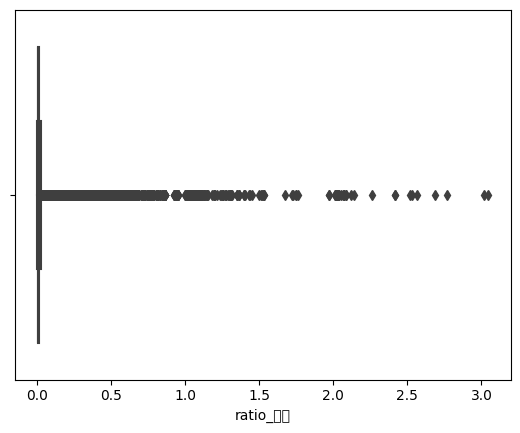

In [157]:
## check the ratio_점수 boxplot

import seaborn as sns

sns.boxplot(x=df['ratio_점수'])

In [158]:
df_ratio_75 = df.loc[df['ratio_점수'] >  0.016589]
df_ratio_75

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,처리결과,...,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio,ratio_점수
0,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,적합,...,0.000000,0.040698,0.000000,0.0,0.002028,0.003633,0.000000,0.001842,0.005825,0.054027
15,(주)씨에버상사,중국,"Ningde Haiyang Food Co., Ltd.",HDMUFZIC1497944,두족류,오징어,오징어,2400,48000.0,적합,...,0.022472,0.001434,0.004320,0.0,0.001402,0.001833,0.002293,0.001842,0.002521,0.038117
22,(주)한성푸드시스템,중국,"WEIHAI XINGTAO TRADING CO.,LTD",HSLI0242245080,어류,복어,자주복,1,1793.0,적합,...,0.008621,0.001434,0.006849,0.0,0.002028,0.008372,0.002401,0.001842,0.002163,0.033710
40,(주)대영에프앤비,중국,RONGCHENG DONGXING AQUATIC PRODUCTS,HDFC17E4764592B,어류,복어,자주복,1,100.0,적합,...,0.000000,0.001434,0.000000,0.0,0.002028,0.008372,0.002401,0.001842,0.002163,0.018240
48,탑(TOP)무역,모로코,NOUNEMAROC,23570035733,어류,장어,뱀장어,1,2480.0,적합,...,0.000000,0.001927,0.000000,0.0,0.002028,0.023529,0.023474,0.002377,0.002163,0.055498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470142,청산,중국,Taishun Pengcheng Aquafarm,WDFCGBA06334206,어류,장어,뱀장어,1,7056.0,적합,...,0.000000,0.001434,0.000000,0.0,0.002028,0.023529,0.023474,0.001842,0.002163,0.054471
470143,네오푸드,미국,"Gulf Mist,inc. (F/V Alaska Mist)",DN2204DCHBSN04,어류,대구,대구,410,7447.0,적합,...,0.000000,0.007358,0.000000,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038
470148,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,적합,...,0.000000,0.007358,0.000000,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038
470149,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,적합,...,0.000000,0.007358,0.000000,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038


In [159]:
df_ratio_25 = df.loc[df['ratio_점수'] >  0.007893]

In [160]:
df_ratio_50 = df.loc[df['ratio_점수'] >  0.010675]

In [168]:
df.value_counts('처리결과')

처리결과
적합     469353
부적합       885
Name: count, dtype: int64

#### Creating the model

In [1]:
### read the data from the database
import pandas as pd
 
df = pd.read_csv('seafood_2022_class_and_distributed_method_ratio_for_model.csv')
df

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,처리결과,...,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio,ratio_점수
0,한스무역,스리랑카,SOUTH SEA FOOD,KMTCCMB0047185,어류,방어,참치방어,143,915.2,적합,...,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825,0.054027
1,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,두족류,낙지,낙지,1,3300.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
2,용해수산,중국,"YANTAI HANSHENG AQUATIC FOODS CO., LTD.",HDFC17E4766580,기타,개불,개불,1,150.0,적합,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
3,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,두족류,낙지,낙지,1,2000.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
4,주식회사 양지무역,중국,"YANTAI RUNHAI AQUATIC PRODUCTS CO.,LTD.",HDFC17E4766592A,기타,개불,개불,1,300.0,적합,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470146,(주)신해무역,중국,"Shandong Haidu Ocean Product Co.,Ltd.",SOFPRWB22044571,두족류,오징어,오징어,8300,124500.0,적합,...,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521,0.011325
470147,(주)광천김,페루,CORPESMAR S.A.C,COSU6345238060,두족류,오징어,오징어,1100,22000.0,적합,...,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521,0.011404
470148,네오푸드,미국,Aleutian Longline LLC - F/V Arctic Prowler,NAM5114609,어류,대구,대구,29,535.0,적합,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038
470149,네오푸드,미국,Aleutian Longline LLC - F/V U.S. Liberator,NAM5114609,어류,대구,대구,64,1185.0,적합,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038


In [2]:
data = df.copy()

In [3]:
## predict the '처리결과'

input_columns = df.columns.tolist()

input_columns.remove('처리결과')

output_column = '처리결과'


category_columns = ['수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명', '유통방식', '검사종류_text', 'year', 'month', 'week', 'year_month', 'year_week', 'season','수출국_대륙']

In [4]:
df.columns

Index(['수입화주', '수출국', '해외제조업소', '수출업소', '품명_대분류', '품명_중분류', '품명', '총수량',
       '총순중량', '처리결과', '유통방식', '검사종류_text', 'year', 'month', 'week',
       'year_month', 'year_week', 'season', '수출국_대륙', '수입화주_ratio',
       '수출국_ratio', '해외제조업소_ratio', '수출업소_ratio', '품명_대분류_ratio',
       '품명_중분류_ratio', '품명_ratio', '수출국_대륙_ratio', '유통방식_ratio', 'ratio_점수'],
      dtype='object')

In [5]:
## '부적합' = 1, '적합' = 0

df['처리결과'] = df['처리결과'].replace('부적합', 1)
df['처리결과'] = df['처리결과'].replace('적합', 0)

In [6]:
### label encoding for the category columns and save the label encoder for each column

from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in category_columns:

    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

,수입화주,수출국,해외제조업소,수출업소,품명_대분류,품명_중분류,품명,총수량,총순중량,처리결과,...,수입화주_ratio,수출국_ratio,해외제조업소_ratio,수출업소_ratio,품명_대분류_ratio,품명_중분류_ratio,품명_ratio,수출국_대륙_ratio,유통방식_ratio,ratio_점수
0,4075,52,6227,98698,4,53,423,143,915.2,0,...,0.0,0.040698,0.0,0.0,0.002028,0.003633,0.000000,0.001842,0.005825,0.054027
1,2581,76,7273,80911,2,23,96,1,3300.0,0,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
2,2581,76,7273,80911,1,10,34,1,150.0,0,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
3,3199,76,7291,80913,2,23,96,1,2000.0,0,...,0.0,0.001434,0.0,0.0,0.001402,0.001353,0.001353,0.001842,0.002163,0.009547
4,3199,76,7291,80913,1,10,34,1,300.0,0,...,0.0,0.001434,0.0,0.0,0.001188,0.000000,0.000000,0.001842,0.002163,0.006627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470146,555,76,6404,130279,2,79,348,8300,124500.0,0,...,0.0,0.001434,0.0,0.0,0.001402,0.001833,0.002293,0.001842,0.002521,0.011325
470147,88,103,1231,55312,2,79,348,1100,22000.0,0,...,0.0,0.001134,0.0,0.0,0.001402,0.001833,0.002293,0.002221,0.002521,0.011404
470148,1452,35,545,110631,4,31,131,29,535.0,0,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038
470149,1452,35,547,110631,4,31,131,64,1185.0,0,...,0.0,0.007358,0.0,0.0,0.002028,0.001560,0.000849,0.004721,0.002521,0.019038


In [7]:
## try to inverse transform the label encoder

label_encoders['수입화주'].inverse_transform(df['수입화주'])


array(['한스무역', '용해수산', '용해수산', ..., '네오푸드', '네오푸드', '네오푸드'], dtype=object)

In [8]:
df['ratio_점수'].describe()

count    470151.000000
mean          0.016941
std           0.040753
min           0.003756
25%           0.007898
50%           0.010628
75%           0.016569
max           3.046387
Name: ratio_점수, dtype: float64

In [9]:
df_ratio_25 = df.loc[df['ratio_점수'] > 0.007898]

df_ratio_50 = df.loc[df['ratio_점수'] > 0.010628]

df_ratio_75 = df.loc[df['ratio_점수'] > 0.016569]

In [10]:
from sklearn.model_selection import train_test_split

def divide_train_test(data_frame):
    # Create a copy of the original DataFrame to avoid modifying the original one
    data = data_frame.copy()
    X = data.drop('처리결과', axis=1)
    y = data['처리결과']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = divide_train_test(df)

X_train_ratio_25, X_test_ratio_25, y_train_ratio_25, y_test_ratio_25 = divide_train_test(df_ratio_25)

X_train_ratio_50, X_test_ratio_50, y_train_ratio_50, y_test_ratio_50 = divide_train_test(df_ratio_50)

X_train_ratio_75, X_test_ratio_75, y_train_ratio_75, y_test_ratio_75 = divide_train_test(df_ratio_75)

In [12]:
## create the function to resample the data using random oversampling, SVMSMOTE, SMOTEENC, SMOTETOMEK, SMOTEBORDERLINE, KMeansSMOTE

from imblearn.over_sampling import RandomOverSampler, SVMSMOTE, SMOTEN,SMOTENC, BorderlineSMOTE, KMeansSMOTE

def resample_data(X_train, y_train, method):

    # Create a copy of the original DataFrame to avoid modifying the original one
    X_train_resampled = X_train.copy()
    y_train_resampled = y_train.copy()

    # Create the resampling method and fit the training data to it
    resampling_method = method(random_state=1)
    X_train_resampled, y_train_resampled = resampling_method.fit_resample(X_train_resampled, y_train_resampled)
    
    # Rename the outputs
    X_train_resampled.name = f'X_train_resampled_{method.__name__}'
    y_train_resampled.name = f'y_train_resampled_{method.__name__}'
    
    return X_train_resampled, y_train_resampled


In [13]:

X_train_resampled_ratio_25_ROS, y_train_resampled_ratio_25_ROS = resample_data(X_train_ratio_25, y_train_ratio_25, RandomOverSampler)

X_train_resampled_ratio_25_SVMSMOTE, y_train_resampled_ratio_25_SVMSMOTE = resample_data(X_train_ratio_25, y_train_ratio_25, SVMSMOTE)

X_train_resampled_ratio_25_SMOTEN, y_train_resampled_ratio_25_SMOTEN = resample_data(X_train_ratio_25, y_train_ratio_25, SMOTEN)



In [1]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# # Function to plot the data
# def plot_2d_space(X, y, label='Classes', ax=None):
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)
    
#     # Create a scatter plot
#     scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5, label=label)
    
#     # Set title and labels
#     ax.set_title(label)
#     ax.set_xlabel('PCA1')
#     ax.set_ylabel('PCA2')
 
    
#     # Return the scatter plot (useful for creating legends)
#     return scatter

# # Encode string class labels to integers
# encoder = LabelEncoder()

# # Assuming X_train_ratio_25 and y_train_ratio_25 are defined
# # Encode the original labels
# y_train_encoded = encoder.fit_transform(y_train_ratio_25)

# # Encode the resampled labels
# y_train_resampled_ratio_25_ROS_encoded = encoder.transform(y_train_resampled_ratio_25_ROS)
# y_train_resampled_ratio_25_SVMSMOTE_encoded = encoder.transform(y_train_resampled_ratio_25_SVMSMOTE)
# y_train_resampled_ratio_25_SMOTEN_encoded = encoder.transform(y_train_resampled_ratio_25_SMOTEN)

# # Create a figure with subplots
# fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# # Plot original data
# scatter_original = plot_2d_space(X_train_ratio_25, y_train_encoded, 'Original Data', axs[0, 0])

# # Plot ROS data
# scatter_ros = plot_2d_space(X_train_resampled_ratio_25_ROS, y_train_resampled_ratio_25_ROS_encoded, 'ROS', axs[0, 1])

# # Plot SVMSMOTE data
# scatter_svmsmote = plot_2d_space(X_train_resampled_ratio_25_SVMSMOTE, y_train_resampled_ratio_25_SVMSMOTE_encoded, 'SVMSMOTE', axs[1, 0])

# # Plot SMOTEN data
# scatter_smoten = plot_2d_space(X_train_resampled_ratio_25_SMOTEN, y_train_resampled_ratio_25_SMOTEN_encoded, 'SMOTEN', axs[1, 1])

# # Create a legend for the colors
# labels = list(encoder.classes_)
# handles = [plt.Line2D([], [], color=scatter_original.get_facecolor()[0], label=label, marker='o') for label in labels]
# fig.legend(handles, labels, loc='upper right')

# plt.tight_layout()
# plt.show()




In [14]:
y_train_resampled_ratio_25_ROS.value_counts(normalize=True)

y_train_resampled_RandomOverSampler
0    0.5
1    0.5
Name: proportion, dtype: float64

In [15]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import VotingClassifier


In [16]:
y_train_resampled_ratio_25_ROS

0         0
1         0
2         0
3         0
4         0
         ..
563103    1
563104    1
563105    1
563106    1
563107    1
Name: y_train_resampled_RandomOverSampler, Length: 563108, dtype: int64

In [17]:
# Initialize the individual models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
nb = GaussianNB()

# Create a voting classifier for ensemble learning
# 'soft' voting takes the probabilities into account
# 'hard' voting takes the mode of the predictions
voting_clf_soft = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('lr', lr), ('nb', nb)], voting='soft')
voting_clf_hard = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('lr', lr), ('nb', nb)], voting='hard')

# Fit the ensemble models
voting_clf_soft.fit(X_train_resampled_ratio_25_ROS, y_train_resampled_ratio_25_ROS)
voting_clf_hard.fit(X_train_resampled_ratio_25_ROS, y_train_resampled_ratio_25_ROS)

# Predictions
y_pred_soft = voting_clf_soft.predict(X_test)
y_pred_hard = voting_clf_hard.predict(X_test)



c:\Users\user\.conda\envs\general_use\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\.conda\envs\general_use\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [19]:
# Evaluate models
precision_soft = precision_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
auc_soft = roc_auc_score(y_test, voting_clf_soft.predict_proba(X_test)[:, 1])

precision_hard = precision_score(y_test, y_pred_hard)
recall_hard = recall_score(y_test, y_pred_hard)
f1_hard = f1_score(y_test, y_pred_hard)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
# # AUC is typically used with soft voting as it requires probability scores
# auc_hard = roc_auc_score(y_test, voting_clf_hard.predict_proba(X_test)[:, 1], pos_label='부적합')
evaluation_metrics_soft = {
    'precision': precision_soft,
    'recall': recall_soft,
    'f1': f1_soft,
    'accuracy': accuracy_soft,
    'auc': auc_soft
}

evaluation_metrics_hard = {
    'precision': precision_hard,
    'recall': recall_hard,
    'f1': f1_hard,
    'accuracy': accuracy_hard,
}

evaluation_metrics_soft, evaluation_metrics_hard

({'precision': 0.839572192513369,
  'recall': 0.8820224719101124,
  'f1': 0.8602739726027397,
  'accuracy': 0.9994576256766385,
  'auc': 0.9587633876883968},
 {'precision': 0.8409090909090909,
  'recall': 0.8314606741573034,
  'f1': 0.8361581920903954,
  'accuracy': 0.9993831821420596})

In [20]:
y_test.value_counts(normalize=True)

처리결과
0    0.998107
1    0.001893
Name: proportion, dtype: float64

In [21]:
## count the class distribution of the y_pred_soft and y_pred_hard

pd.Series(y_pred_soft).value_counts(normalize=True)

0    0.998011
1    0.001989
Name: proportion, dtype: float64

In [22]:
pd.Series(y_pred_hard).value_counts(normalize=True)

0    0.998128
1    0.001872
Name: proportion, dtype: float64

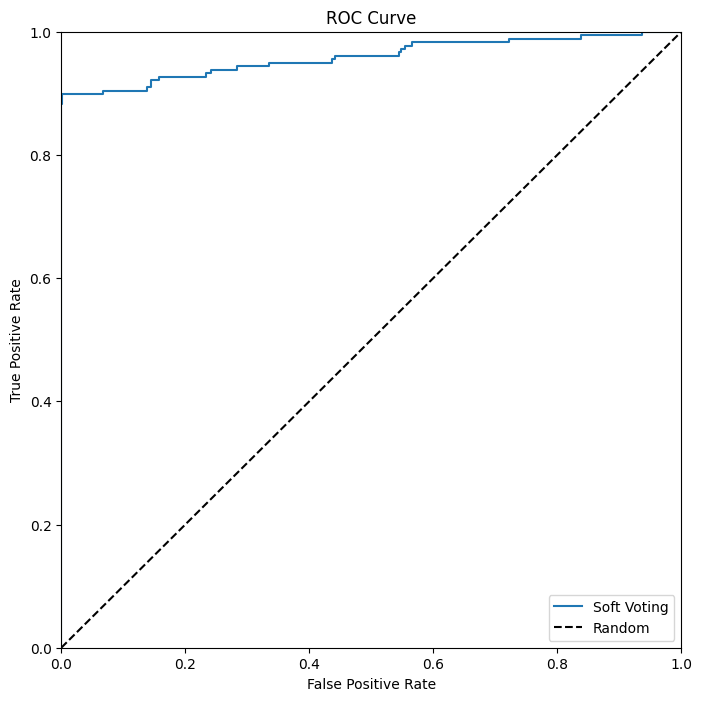

In [24]:
## plot the ROC curve

from sklearn.metrics import roc_curve

# Get the probabilities for the positive class

y_proba_soft = voting_clf_soft.predict_proba(X_test)[:, 1]


# Get the FPR, TPR, and threshold values

fpr_soft, tpr_soft, thresholds_soft = roc_curve(y_test, y_proba_soft, pos_label=1)

# Plot the ROC curve

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr_soft, tpr_soft, label='Soft Voting')

# Plot the 45 degree line

plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Axes limits and labels

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend()

plt.show()

In [25]:
### import the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_soft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93853
           1       0.84      0.88      0.86       178

    accuracy                           1.00     94031
   macro avg       0.92      0.94      0.93     94031
weighted avg       1.00      1.00      1.00     94031



In [23]:
input_columns

['수입화주',
 '수출국',
 '해외제조업소',
 '수출업소',
 '품명_대분류',
 '품명_중분류',
 '품명',
 '총수량',
 '총순중량',
 '유통방식',
 '검사종류_text',
 'year',
 'month',
 'week',
 'year_month',
 'year_week',
 'season',
 '수출국_대륙',
 '수입화주_ratio',
 '수출국_ratio',
 '해외제조업소_ratio',
 '수출업소_ratio',
 '품명_대분류_ratio',
 '품명_중분류_ratio',
 '품명_ratio',
 '수출국_대륙_ratio',
 '유통방식_ratio',
 'ratio_점수']

In [25]:
voting_clf_soft

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('nb', GaussianNB())],
                 voting='soft')

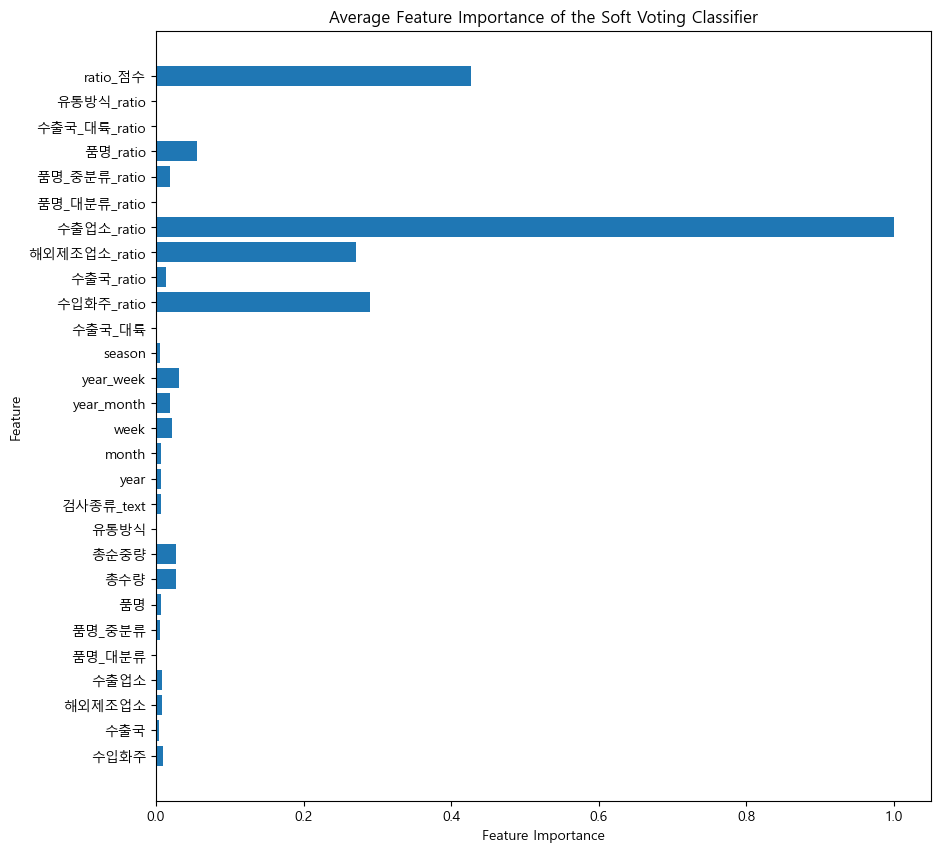

In [38]:
from sklearn.preprocessing import minmax_scale
import numpy as np

norm_importances = []

# Extract and normalize feature importances for each estimator
for clf in voting_clf_soft.estimators_:
    if hasattr(clf, 'feature_importances_'):
        norm_importances.append(minmax_scale(clf.feature_importances_))

# Convert to numpy array for easier calculations
norm_importances = np.array(norm_importances)

# Calculate the average importance
if norm_importances.size > 0:
    average_importance = np.mean(norm_importances, axis=0)
else:
    print("No models with feature importances found.")

# Now you can use average_importance for plotting

average_importance

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.barh(input_columns, average_importance)

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('Average Feature Importance of the Soft Voting Classifier')

plt.show()

In [35]:
feature_importance_series = pd.Series(average_importance, index=input_columns).sort_values(ascending=False)

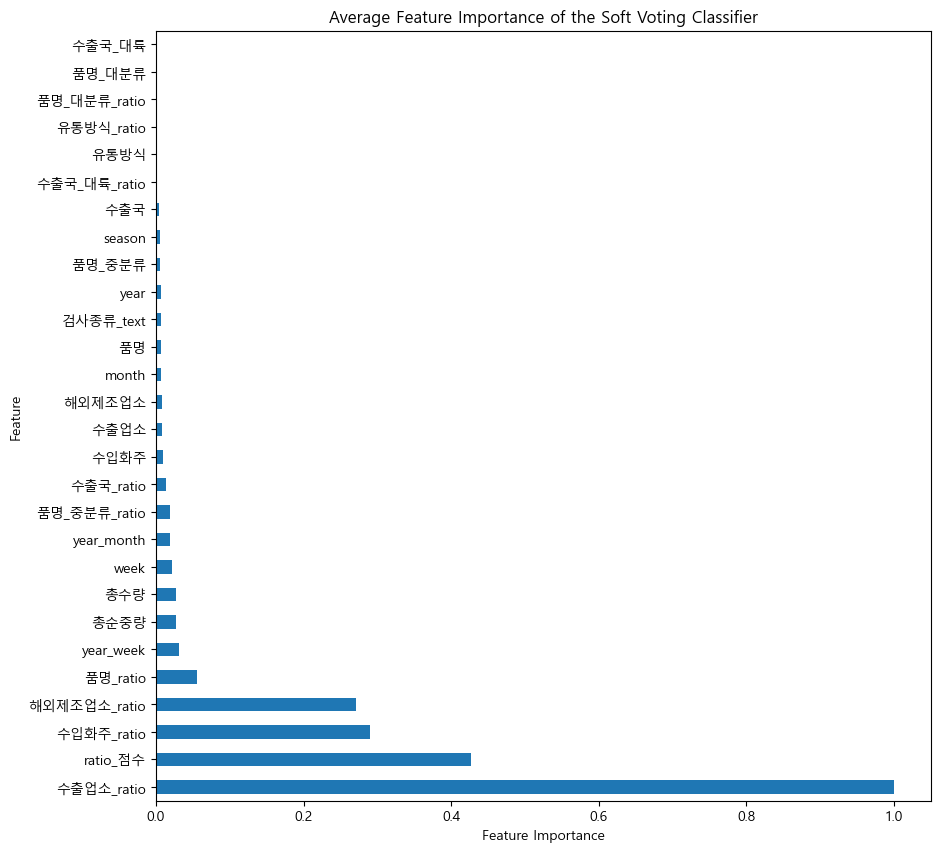

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## plot the feature importance

plt.figure(figsize=(10, 10))

feature_importance_series.plot(kind='barh')

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('Average Feature Importance of the Soft Voting Classifier')

plt.show()

In [40]:
model_probabilities = [clf.predict_proba(X_test) for clf in voting_clf_soft.estimators_]

In [48]:
voting_clf_soft.estimators_

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 LogisticRegression(random_state=42),
 GaussianNB()]

In [47]:
pd.DataFrame(model_probabilities[3])

,0,1
0,0.563696,0.436304
1,0.942292,0.057708
2,0.899678,0.100322
3,0.881081,0.118919
4,0.100162,0.899838
...,...,...
94026,0.377965,0.622035
94027,0.833086,0.166914
94028,0.949549,0.050451
94029,0.956087,0.043913


c:\Users\user\.conda\envs\general_use\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\.conda\envs\general_use\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\.conda\envs\general_use\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\.conda\envs\general_use\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

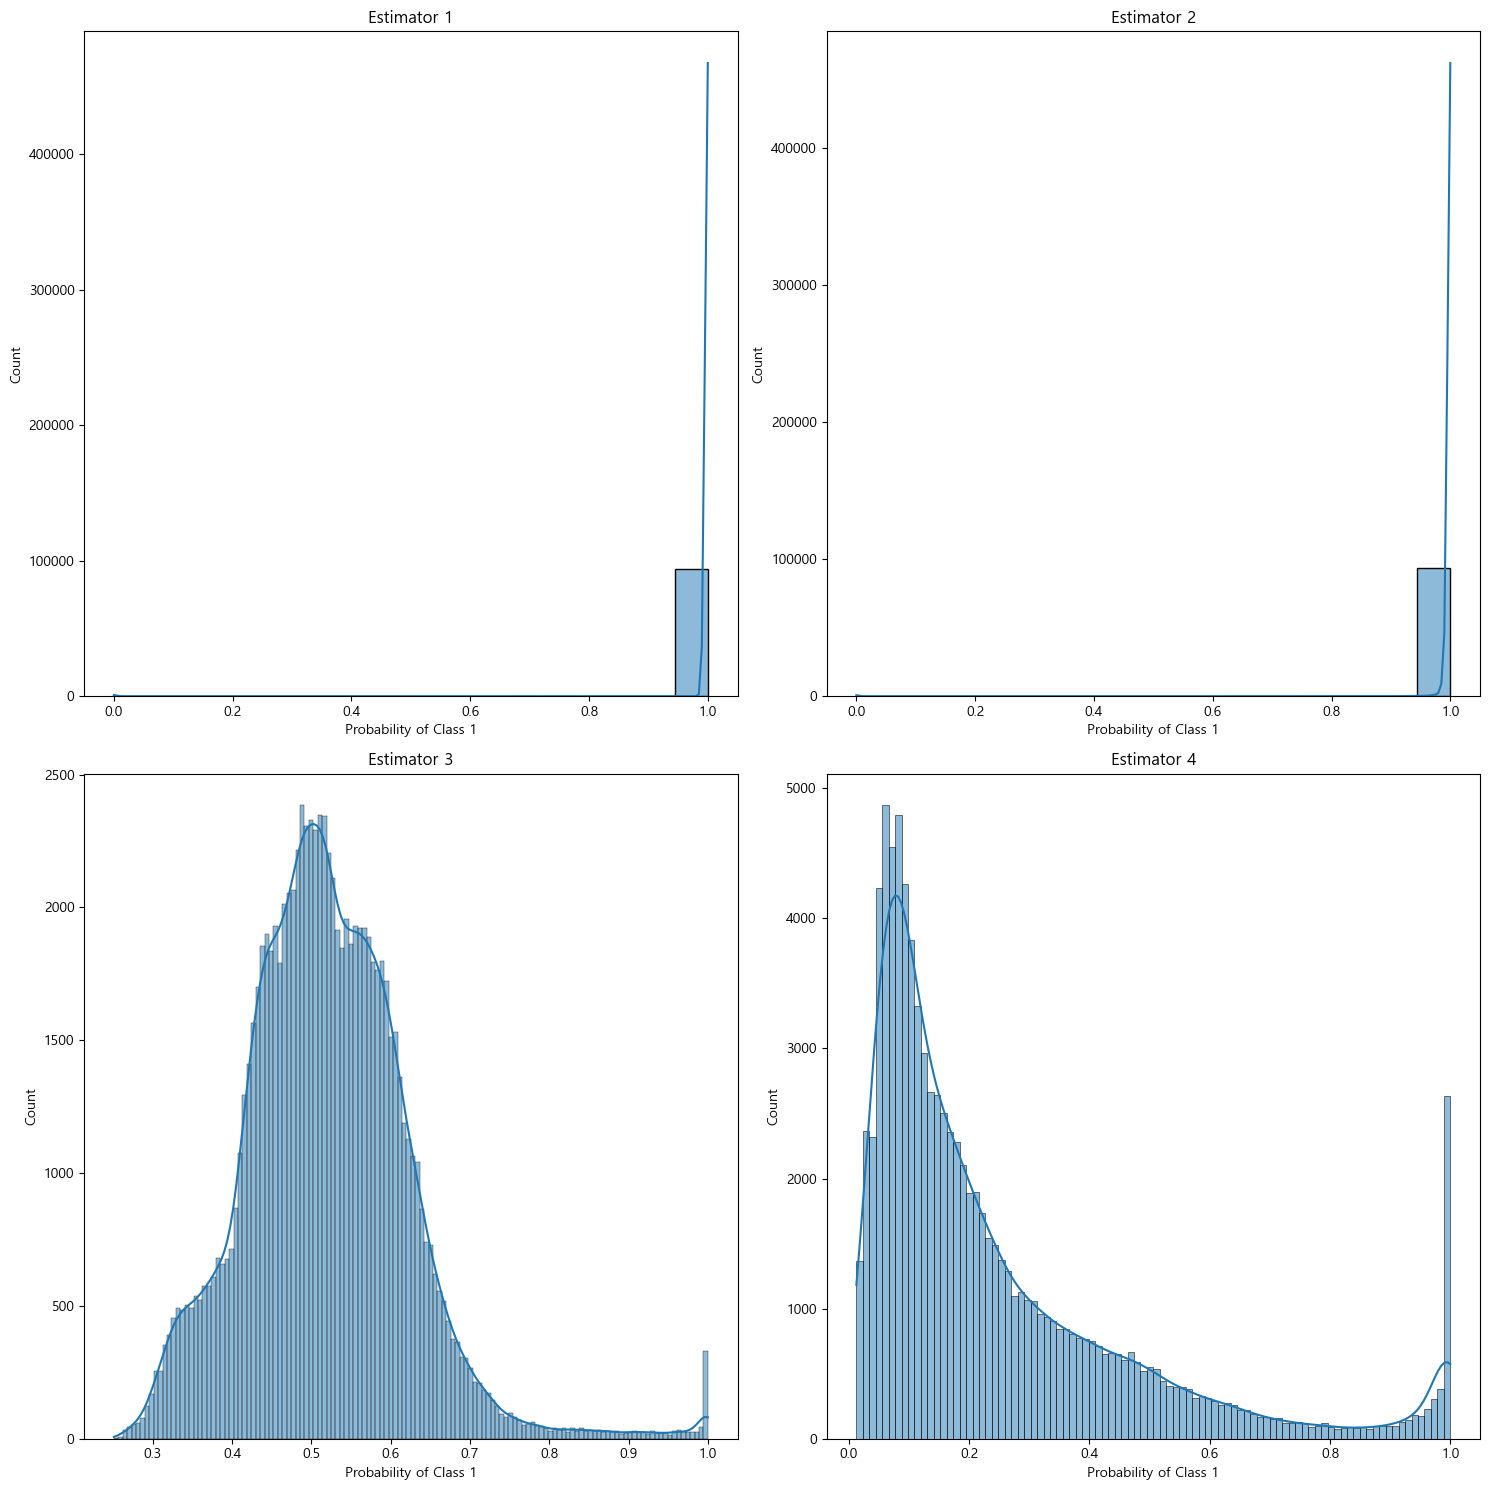

In [50]:
### plot the probability distribution of the model as sns subplot

import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    sns.histplot(model_probabilities[i][:, 1], kde=True, ax=ax)
    ax.set_title(f'Estimator {i+1}')
    ax.set_xlabel('Probability of Class 1')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [51]:
## checking the p-value of the model

from scipy.stats import ttest_ind

# Get the probabilities for the positive class

y_proba_soft = voting_clf_soft.predict_proba(X_test)[:, 1]

# Split the probabilities into two groups based on the true class

y_proba_soft_pos = y_proba_soft[y_test == '부적합']

y_proba_soft_neg = y_proba_soft[y_test == '적합']

# Perform the t-test

t_stat, p_val = ttest_ind(y_proba_soft_pos, y_proba_soft_neg)

t_stat, p_val

(-76.74530469492564, 0.0)

In [56]:
## checking the p-value of each estimator

p_values = []
t_stats = []

# Perform the t-test for each estimator

for i in range(len(voting_clf_soft.estimators_)):
    # Get the probabilities for the positive class
    y_proba = voting_clf_soft.estimators_[i].predict_proba(X_test)[:, 1]
    
    # Split the probabilities into two groups based on the true class
    y_proba_pos = y_proba[y_test == '부적합']
    y_proba_neg = y_proba[y_test == '적합']

    # Perform the t-test

    t_stat, p_val = ttest_ind(y_proba_pos, y_proba_neg)
    t_stats.append(t_stat)
    p_values.append(p_val)

stat_pvalue = pd.DataFrame({'t_stat': t_stats, 'p_value': p_values}, index=[f'Estimator {i+1}' for i in range(len(voting_clf_soft.named_estimators_))])

stat_pvalue

,t_stat,p_value
Estimator 1,-506.396637,0.000000
Estimator 2,-574.192274,0.000000
Estimator 3,-3.692151,0.000222
Estimator 4,-4.283734,0.000018


In [58]:
y_proba_pos.mean()

0.17386554670852153

In [59]:
y_proba_neg.mean()

0.24958703259574938